## Linear regression(ordinary least squares)

In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import train_test_split

X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)

print('lr.coef:',lr.coef_)#slope
print('lr.intercept:',lr.intercept_) #intercept

lr.coef: [0.39390555]
lr.intercept: -0.031804343026759746


In [3]:
# R-Squares
print('Training set score:{:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test,y_test)))

Training set score:0.67
Test set score:0.66


* The scores on the training and test sets are very close together
    * It means we are likely underfitting, not overfitting     

* For one-dimensional dataset, there is little danger of overfitting, as the model is very simple
* With higher-dimensional datasets(with a large number of features), linear models become more powerful, and there is a higher chance of overfitting

In [4]:
X,y=mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

print('Training set score:{:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test,y_test)))

Training set score:0.95
Test set score:0.61


* This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore, we should try to find a model that allows us to control the complexity.
* One of the mostly commonly used alternatives to standard linear regression is *ridge regression*

## Ridge regression

In [5]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)

print('Training set score:{:.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test,y_test)))

Training set score:0.89
Test set score:0.75


* The training set score of Ridge is lower than for LinearRegression, while the test set score is higher.
    * With linear regression, we were overfitting our data.
    * Ridge is a more restricted model, so we are less likely to overfit
* A less complex model means worse performance on the training set, but better generalization
* As we are only interested in generalization performace, we should choose the **Ridge** model over the **LinearRegression** model.

In [6]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)

print('Training set score:{:.2f}'.format(ridge10.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(ridge10.score(X_test,y_test)))

Training set score:0.79
Test set score:0.64


In [7]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)

print('Training set score:{:.2f}'.format(ridge01.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(ridge01.score(X_test,y_test)))

Training set score:0.93
Test set score:0.77


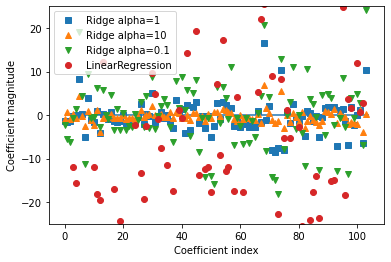

In [8]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

* For alpha=10, the coefficients are mostly between -3 and 3
* The coefficients for the Ridge model with alpha=1,are somewhat larger
* The coefficients for the Ridge model with alpha=0.1 have larger magnitude still.
* Many of the dots corresponding to linear regression without any regularization(alpha would be 0) are so large they are outsiide of the chart

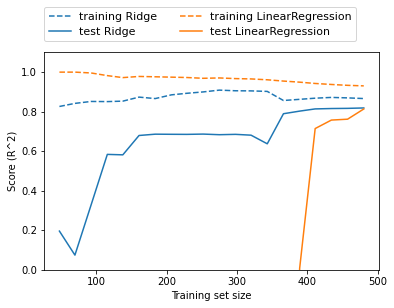

In [9]:
mglearn.plots.plot_ridge_n_samples()

* The training score is higher than the test score for all dataset sizes, for both ridge and linear regression.
* The training score of ridge is lower than the training score for linear regression across the board, because ridge is regularized.
****
* However, the test score for ridge is better, particularly for small subsets of the data.
    * For less than 400 data points, linear regression is not able to learn anything.
    * As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end.
    * The lesson here is that with enough training data, regularization becomes less important, and given enough data, redge and linear regression will have the same performance
* Another interesting aspect of is the decrease in training performance for linear regression.
    * If more data is added, it becomes harder for a model to overfit, or memorize the data

## Lasso

In [10]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
print('Training set score:{:.2f}'.format(lasso.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of features used:',np.sum(lasso.coef_!=0))

Training set score:0.29
Test set score:0.21
Number of features used: 4


* Lasso worked badly, both on the training and the test set.
    * It indicates that the model was underfitting, and we find that it used only 4 of the 104 features.
* Lasso also has a regularization parameter, *alpha*, that controls how strongly coefficients are pushed toward zero

****
When we do decreasing alpha, we also need to increase the default setting of *max_iter*

In [11]:
# increase the default setting of 'max_iter'
# otherwise the model warn us that we should increase max_iter
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print('Training set score:{:.2f}'.format(lasso001.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(lasso001.score(X_test,y_test)))
print('Number of features used:',np.sum(lasso001.coef_!=0))

Training set score:0.90
Test set score:0.77
Number of features used: 33


* A lower alpha allowed us to fit a more complex model, which worked better on the training and test set.
* The performance is slightly better than using *Ridge*, and we are only using only 33 of the 104 features
* This makes this model potentially easier to understand

In [12]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print('Training set score:{:.2f}'.format(lasso00001.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(lasso00001.score(X_test,y_test)))
print('Number of features used:',np.sum(lasso00001.coef_!=0))

Training set score:0.95
Test set score:0.64
Number of features used: 96


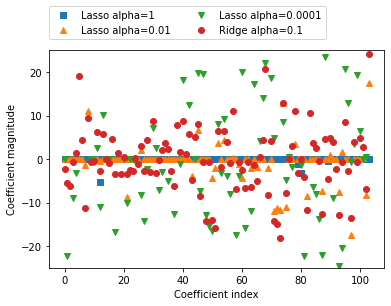

In [13]:
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-25,25)
plt.legend(ncol=2,loc=(0,1.05))

* For alpha=1
    * Most of the coefficients are zero.
    * The remaining coefficients are also small in magnitude.
* For alpha=0.01
    * Most features to be exactly zero
* For alpha=0.0001
    * A model is guite unregularized, with most coefficients nonzero and of large magnitude.
* The **Ridge** model with alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01, but using Ridge, all coefficients are nonzero.

## Linear models for classification

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


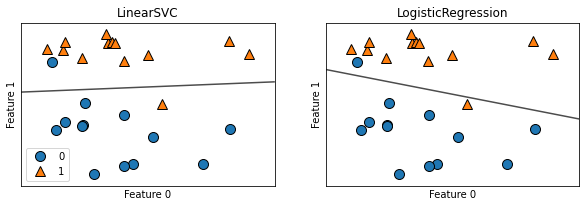

In [15]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

### The parameter of c

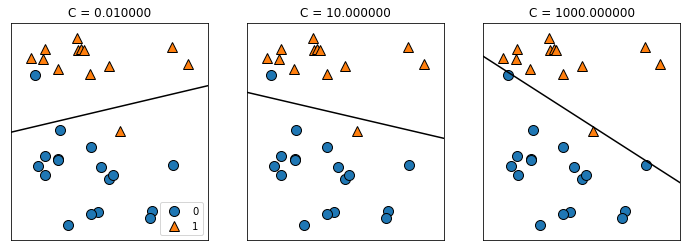

In [16]:
mglearn.plots.plot_linear_svc_regularization()

* The lefthand side
    * having a very small C corresponding to a lot of regularization.
    * The strongly regularized model shooses a relatively horizontal line, misclassifying two points.
****
* The Centre plot
    * Sligtly higher C
    * Focuses more on the two misclassified samples, tilting the decision boundary
****
* The righthand side
    * tilts the decision boundary a lot.
    * correctly classifying all points in class 0,but one of the points in class 1 is still misclassified
        * It is impossilbe to correctly classify all points in the dataset using a straight line.
    * It is hard to correctly classify all points, but might not capture the overall layout of the classes well.
        * The midel is likely overfitting

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* provides good performance, with 95% accuracy on both the training and the test set.
* But as training and test set performance are very close, it is likely that we are underfitting

In [18]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.951
Test set score: 0.958


C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Using C=100 results in higher training set accuracy, and also a sligtly increased test set accuracy.
* Confirming our intuition  that a more complex model should perform better.

In [19]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score: 0.934
Test set score: 0.930


* When moving more to the left along the scale, both training and test set accuracy decrease relative to the default parameters.

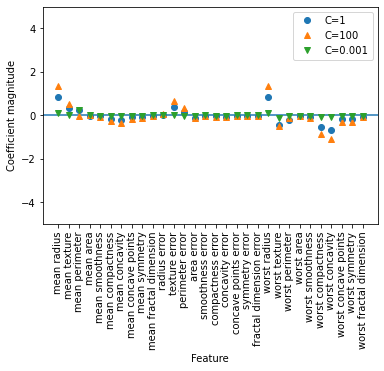

In [20]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using **L1 regularization** might help, as it limits the model to using only a few features

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


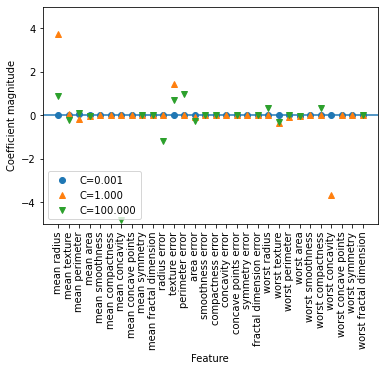

In [21]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)